# Annualising Mean Return and Std of Returns

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format

In [2]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [3]:
msft["log_return"] = np.log(msft.Price / msft.Price.shift()) # daily log returns (log of current price divided by the previous price)
msft

,Price,Returns,log_return
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [5]:
msft.log_return.agg(["mean", "std"]) # mean and std based on daily returns

mean   0.0010
std    0.0172
Name: log_return, dtype: float64

In [6]:
ann_mu = msft.log_return.mean() * 252 # annualised mean return
ann_mu

0.25466357960390723

In [13]:
cagr = np.exp(ann_mu) # don't mix up with cagr
cagr

1.290027556281438

In [10]:
ann_std = msft.log_return.std() * np.sqrt(252) # annualised std of returns
ann_std

0.27381663717464577

In [12]:
ann_std = np.sqrt(msft.log_return.var() * 252) # annualised std of returns
ann_std

0.27381663717464577

## Resampling/Smoothing

In [15]:
msft.head(25)

,Price,Returns,log_return
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
2014-10-08,46.7800,0.0275,0.0271
2014-10-09,45.8500,-0.0199,-0.0201
2014-10-10,44.0300,-0.0397,-0.0405
2014-10-13,43.6500,-0.0086,-0.0087


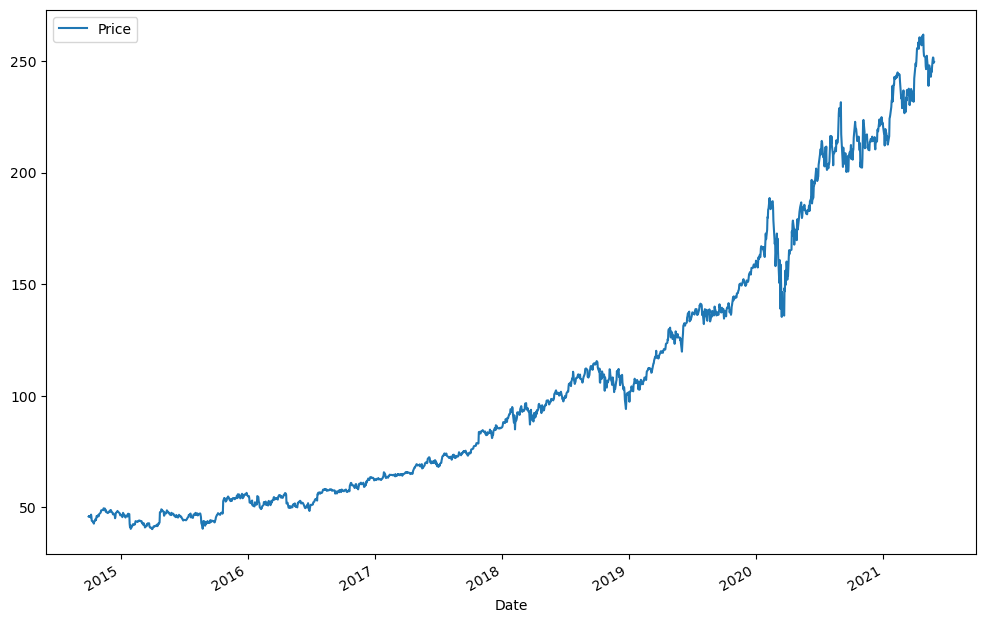

In [16]:
msft.Price.plot(figsize = (12, 8))
plt.legend()

In [17]:
monthly = msft.Price.resample("M").last() # resample to monthly (month end)
monthly

Date
2014-10-31    46.9500
2014-11-30    47.8100
2014-12-31    46.4500
2015-01-31    40.4000
2015-02-28    43.8500
               ...   
2021-01-31   231.9600
2021-02-28   232.3800
2021-03-31   235.7700
2021-04-30   252.1800
2021-05-31   249.6800
Freq: M, Name: Price, Length: 80, dtype: float64

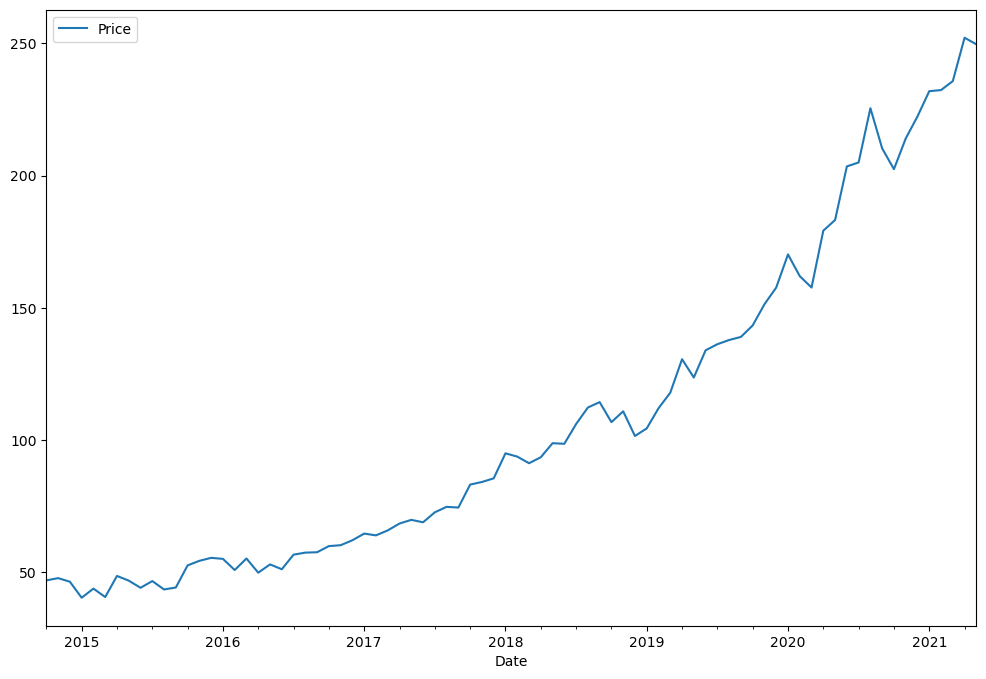

In [18]:
monthly.plot(figsize = (12, 8))
plt.legend()

### How will the Mean-Variance analysis change with smoothed data?

In [21]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [25]:
for i in range(5):
    resample = msft.Price.resample(freqs[i]).last()
    ann_mean.append(np.log(resample / resample.shift()).mean() * periods[i]) # annualised mean return
    ann_std.append(np.log(resample / resample.shift()).std() * np.sqrt(periods[i])) # annualised std of returns

In [26]:
ann_mean

[0.24025765527761314,
 0.258739013375891,
 0.253837495704879,
 0.253194152871532,
 0.25289038013157555]

In [27]:
ann_std

[0.12724981752067244,
 0.17931392782427705,
 0.20496983822390324,
 0.2308593150008498,
 0.26737210972009995]

In [28]:
summary = pd.DataFrame(data = {"ann_std": ann_std, "ann_mean": ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.1272,0.2403
Q,0.1793,0.2587
M,0.2050,0.2538
W-Fri,0.2309,0.2532
D,0.2674,0.2529


Text(0.5, 1.0, 'Risk/Return')

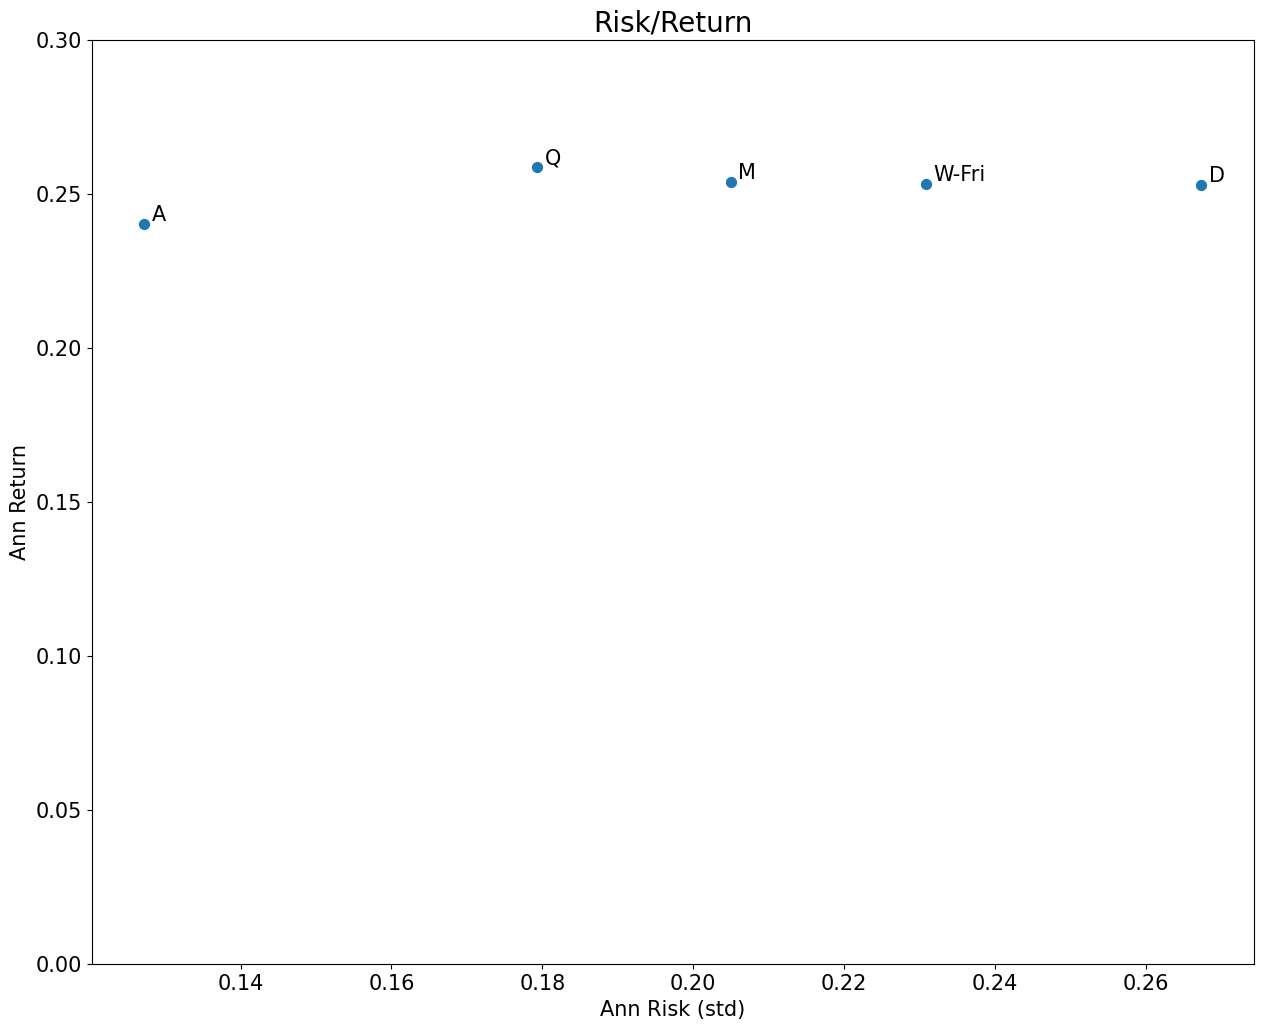

In [30]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15, 12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("Ann Risk (std)", fontsize = 15)
plt.ylabel("Ann Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)

**Smoothing reduces (observed) risk.**

Dubious practices:
- managing (manipulating) performance in reportings.
- adjusting frequency to investor's (average) holding period: volatility is still there.
- comparing assets with different pricing frequency and pricing mechanisms: e.g. real estate with quarterly valuation vs. listed stocks (minutely/hourly/daily prices)

**Take home**: when comparing instruments the frequency of underlying data must be the same! Don't compare apples and oranges.